Predict CLV - Dv is numerical, thus Regression problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeRegressor

In [2]:
# url https://drive.google.com/file/d/1X4pV8Y9O8jm59e1xN6Mh_ywPYxd0eqcE/view?usp=drive_link

file_id = '1X4pV8Y9O8jm59e1xN6Mh_ywPYxd0eqcE'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)

In [ ]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
df.shape

(9134, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [ ]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [ ]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [ ]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
df.skew()

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

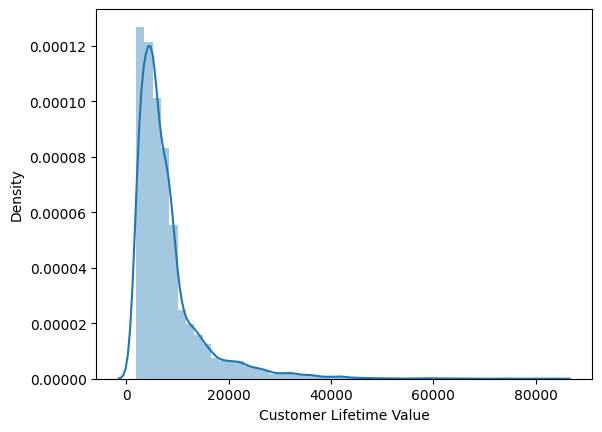

In [ ]:
sns.distplot(df['Customer Lifetime Value'], hist=True )
plt.show()

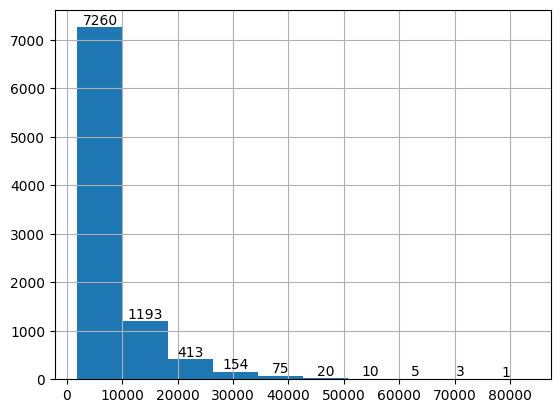

In [ ]:
graph = df['Customer Lifetime Value'].hist()
graph.bar_label(graph.containers[0])
plt.show()

In [ ]:
obj_col = df.select_dtypes(include= ['object']).columns
obj_col

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

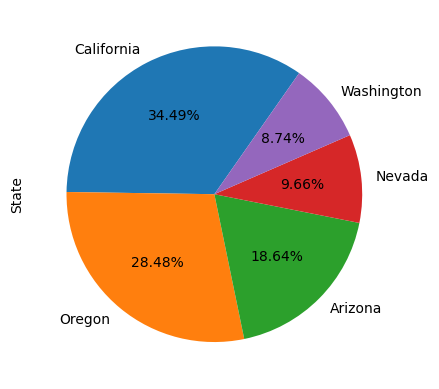

In [ ]:
graph = df['State'].value_counts().plot.pie(autopct='%.2f%%', startangle=55)
plt.show()

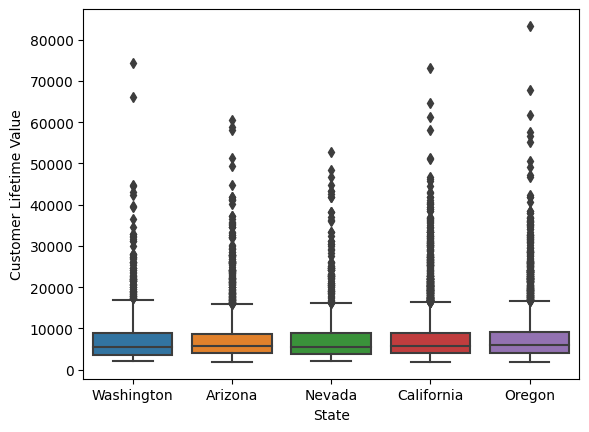

In [ ]:
sns.boxplot(y='Customer Lifetime Value', x= 'State',data=df)
plt.show()

In [ ]:
# graph = sns.countplot(hue='State', x='Customer Lifetime Value', data=df)
# graph.bar_label(graph.containers[0])
# plt.show()

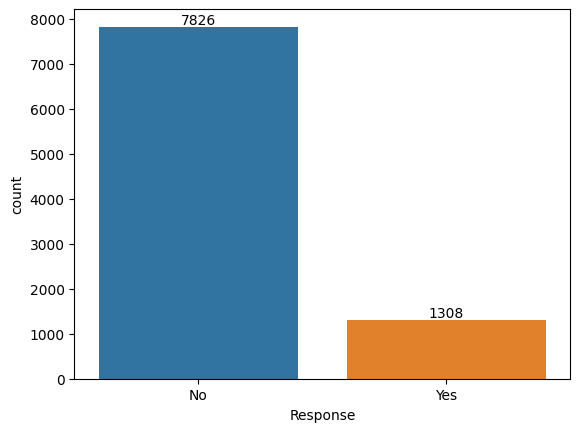

In [ ]:
graph = sns.countplot(x='Response', data=df)
graph.bar_label(graph.containers[0])
plt.show()

In [ ]:
# graph = sns.countplot(x='Coverage', hue ='Response', data=df)
# for container in graph.containers:
#     graph.bar_label(container)
# plt.show()

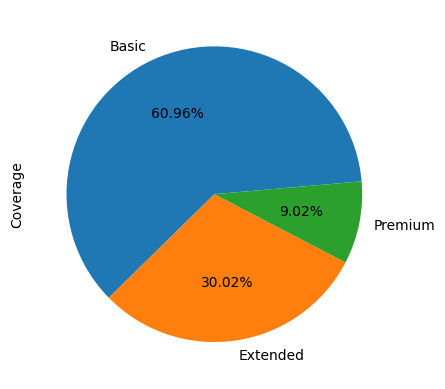

In [ ]:
graph = df['Coverage'].value_counts().plot.pie(autopct='%.2f%%', startangle=5)
plt.show()

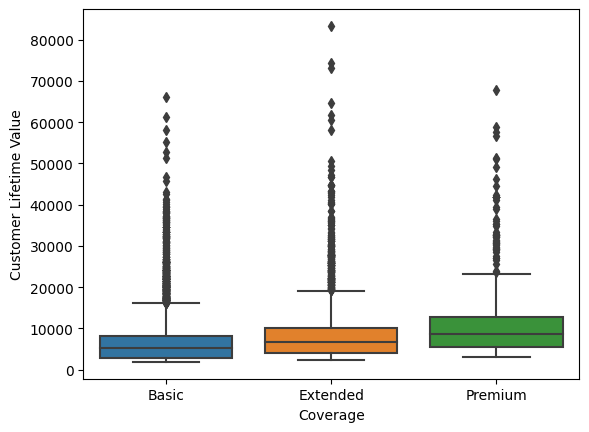

In [ ]:
sns.boxplot(y='Customer Lifetime Value', x= 'Coverage',data=df)
plt.show()

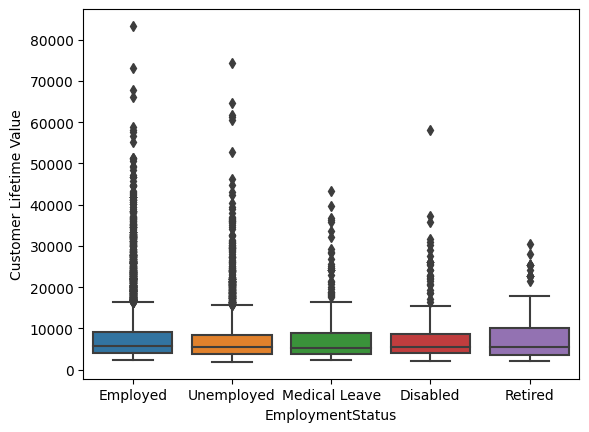

In [ ]:
sns.boxplot(y='Customer Lifetime Value', x= 'EmploymentStatus',data=df)
plt.show()

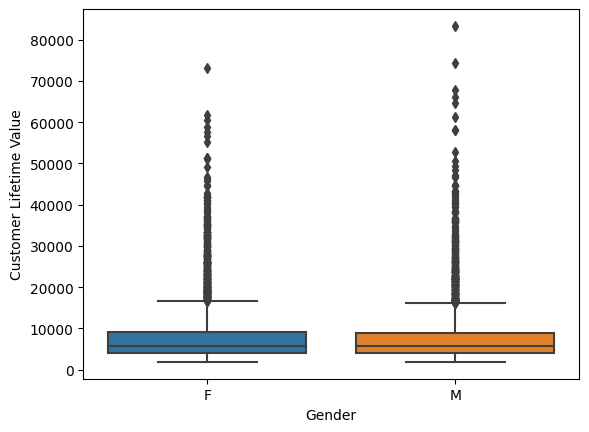

In [ ]:
sns.boxplot(y='Customer Lifetime Value', x= 'Gender',data=df)
plt.show()

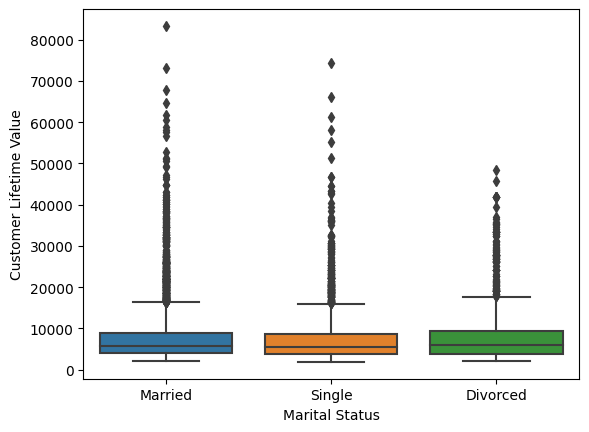

In [ ]:
sns.boxplot(x='Marital Status', y='Customer Lifetime Value', data=df)
plt.show()

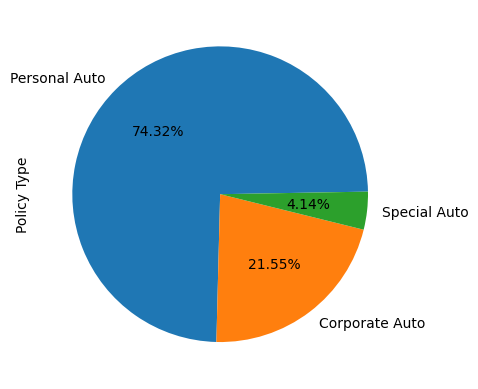

In [ ]:
graph = df['Policy Type'].value_counts().plot.pie(autopct='%.2f%%', startangle=1)
plt.show()

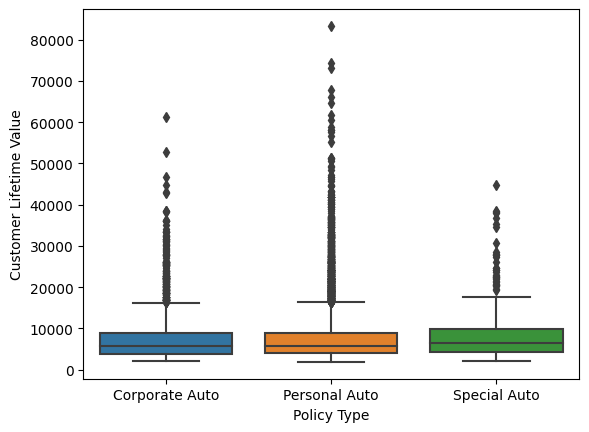

In [ ]:
sns.boxplot(y='Customer Lifetime Value', x= 'Policy Type',data=df)
plt.show()

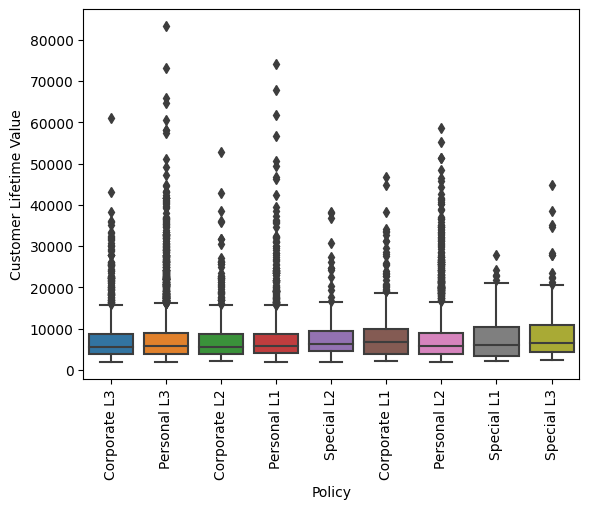

In [ ]:
sns.boxplot(y='Customer Lifetime Value',x = 'Policy', data=df)
plt.xticks(rotation=90)
plt.show()

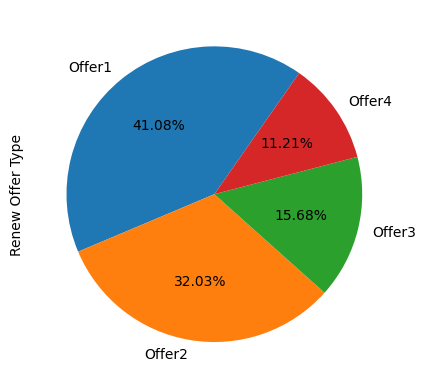

In [ ]:
graph = df['Renew Offer Type'].value_counts().plot.pie(autopct='%.2f%%', startangle=55)
plt.show()

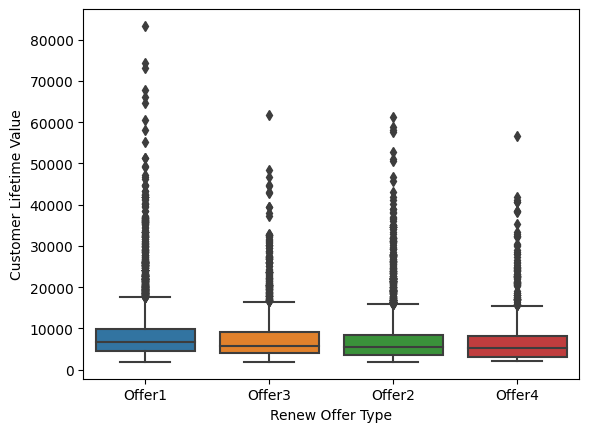

In [ ]:
sns.boxplot(y='Customer Lifetime Value', x= 'Renew Offer Type',data=df)
plt.show()

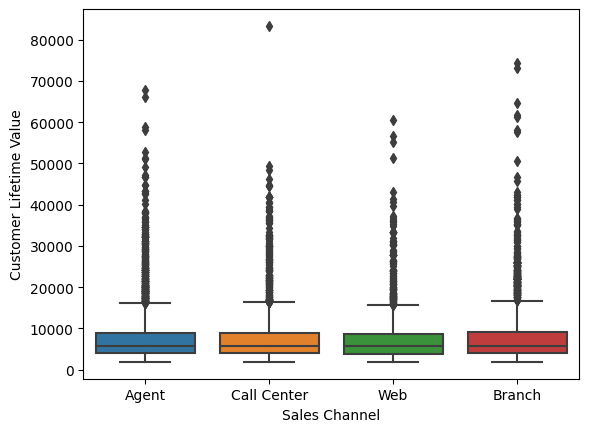

In [ ]:
sns.boxplot(x='Sales Channel', y='Customer Lifetime Value' , data=df)
plt.show()

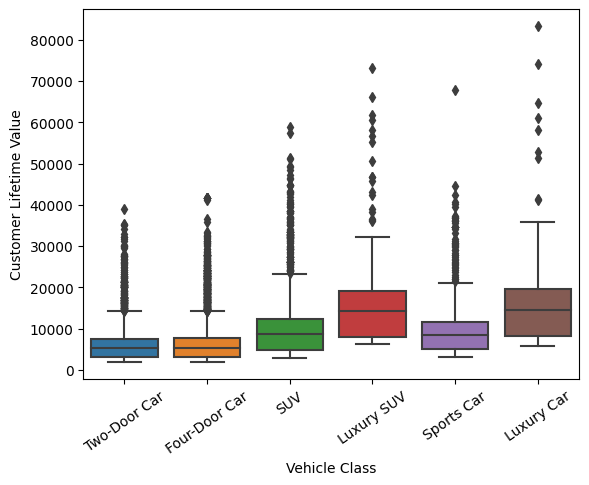

In [ ]:
sns.boxplot(x='Vehicle Class', y='Customer Lifetime Value' , data=df)
plt.xticks(rotation=35)
plt.show()

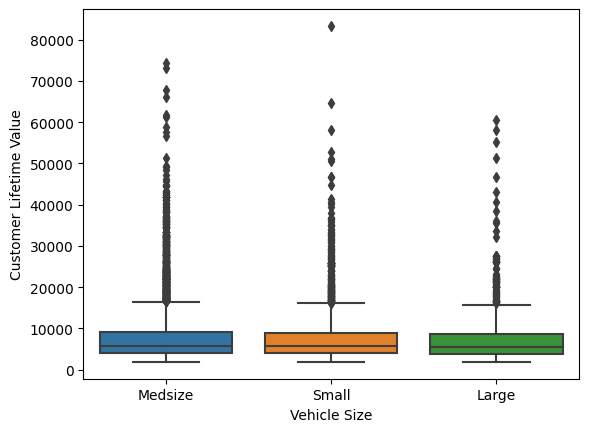

In [ ]:
sns.boxplot(data=df,y='Customer Lifetime Value', x='Vehicle Size')
plt.show()

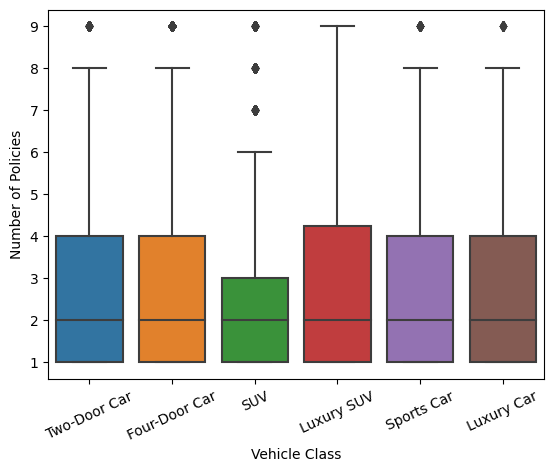

In [ ]:
sns.boxplot(x='Vehicle Class', y='Number of Policies' , data=df)
plt.xticks(rotation=25)
plt.show()

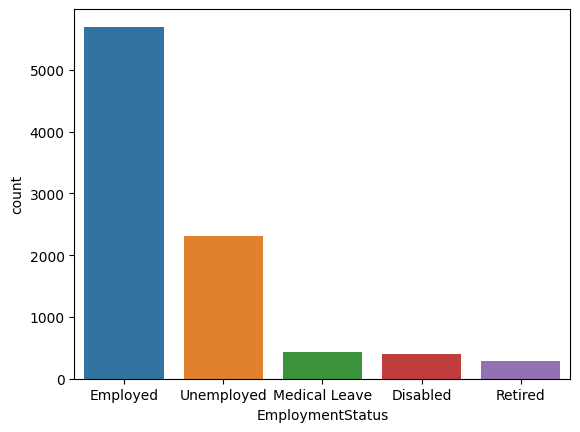

In [ ]:
sns.countplot(x='EmploymentStatus', data=df)
plt.show()

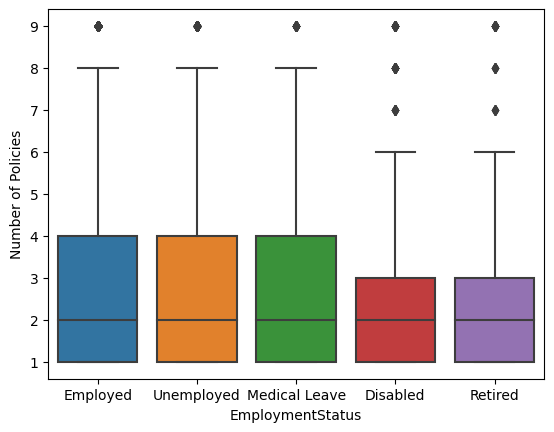

In [ ]:
sns.boxplot(x='EmploymentStatus', y='Number of Policies' , data=df)
plt.show()

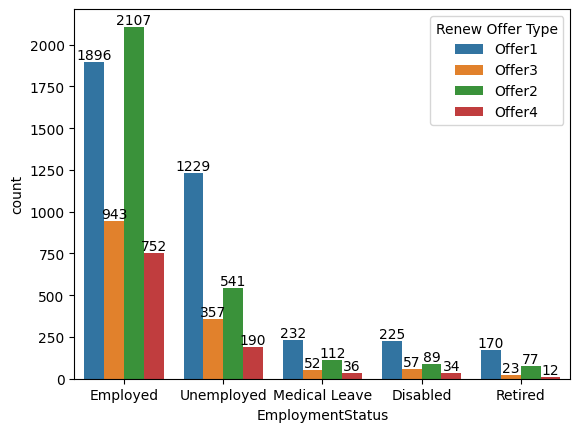

In [ ]:
graph = sns.countplot(x='EmploymentStatus', hue='Renew Offer Type' , data=df)
for container in graph.containers:
    graph.bar_label(container)
plt.show()

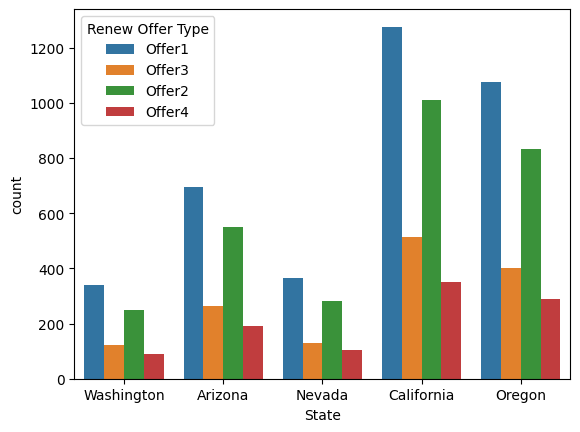

In [ ]:
graph = sns.countplot(x='State', hue='Renew Offer Type' , data=df)
plt.show()

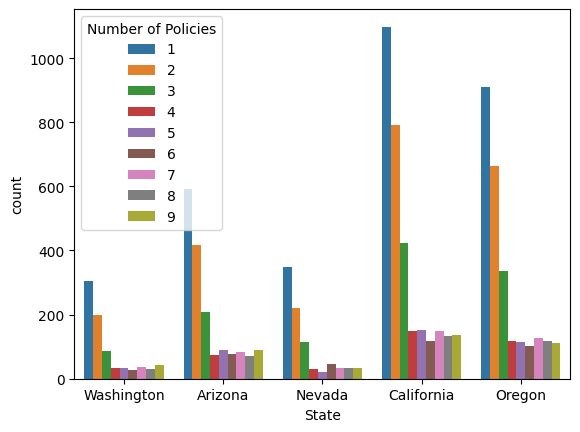

In [ ]:
graph = sns.countplot(x='State', hue='Number of Policies' , data=df)
plt.show()

In [ ]:
num_col = df.select_dtypes(include= ['number']).columns
num_col

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

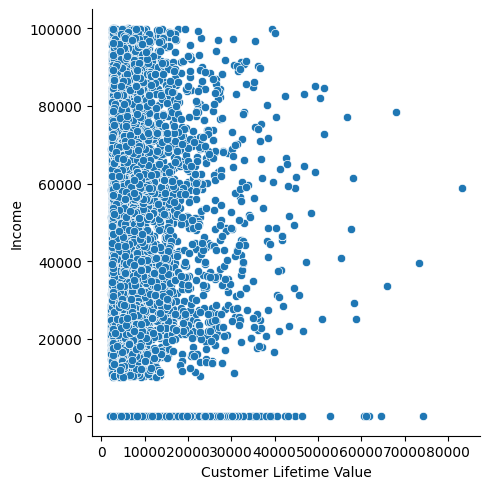

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Income')
plt.show()

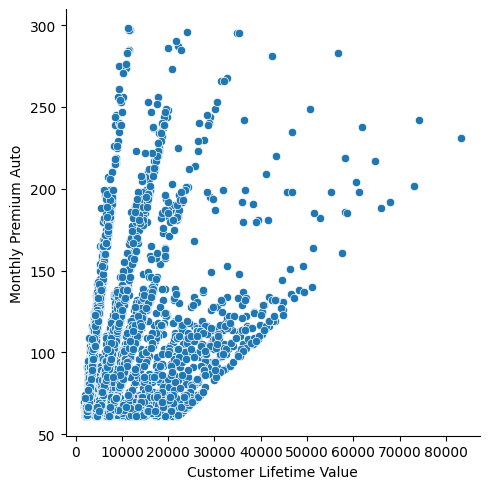

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Monthly Premium Auto')
plt.show()

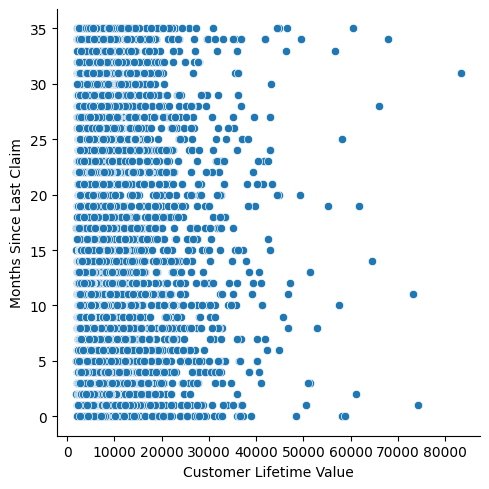

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Months Since Last Claim')
plt.show()

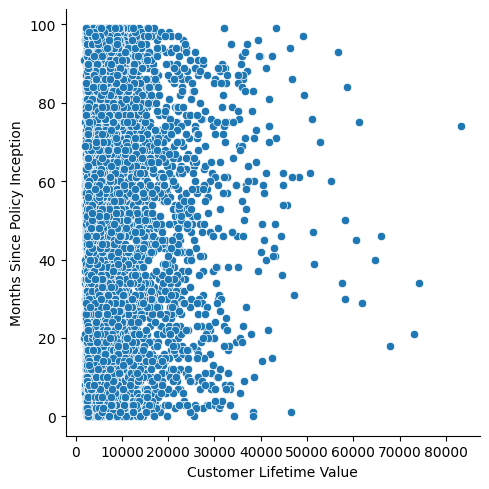

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Months Since Policy Inception')
plt.show()

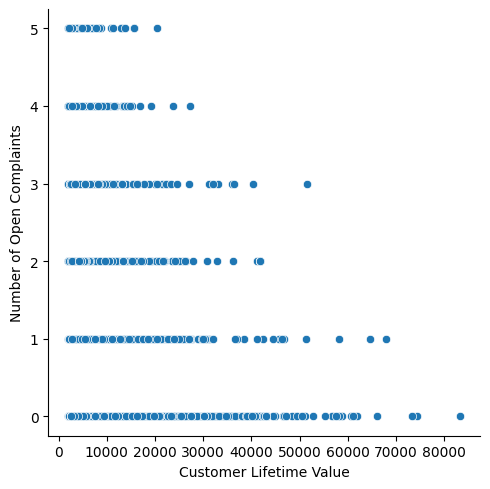

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Number of Open Complaints')
plt.show()

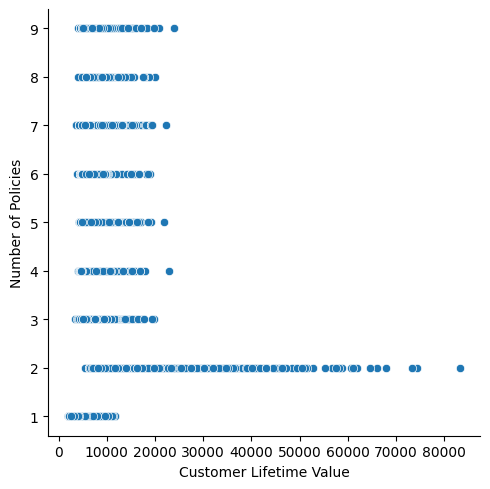

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Number of Policies')
plt.show()

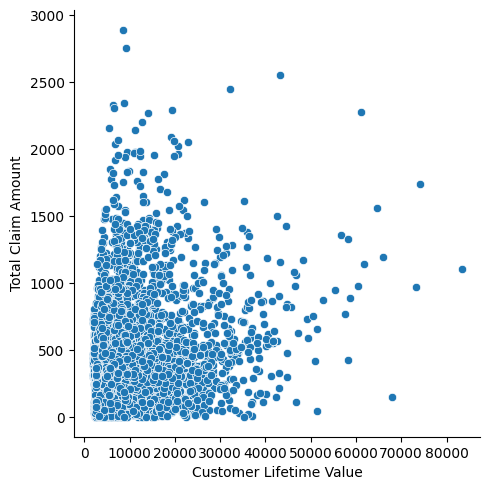

In [ ]:
sns.relplot(data=df,x='Customer Lifetime Value', y='Total Claim Amount')
plt.show()

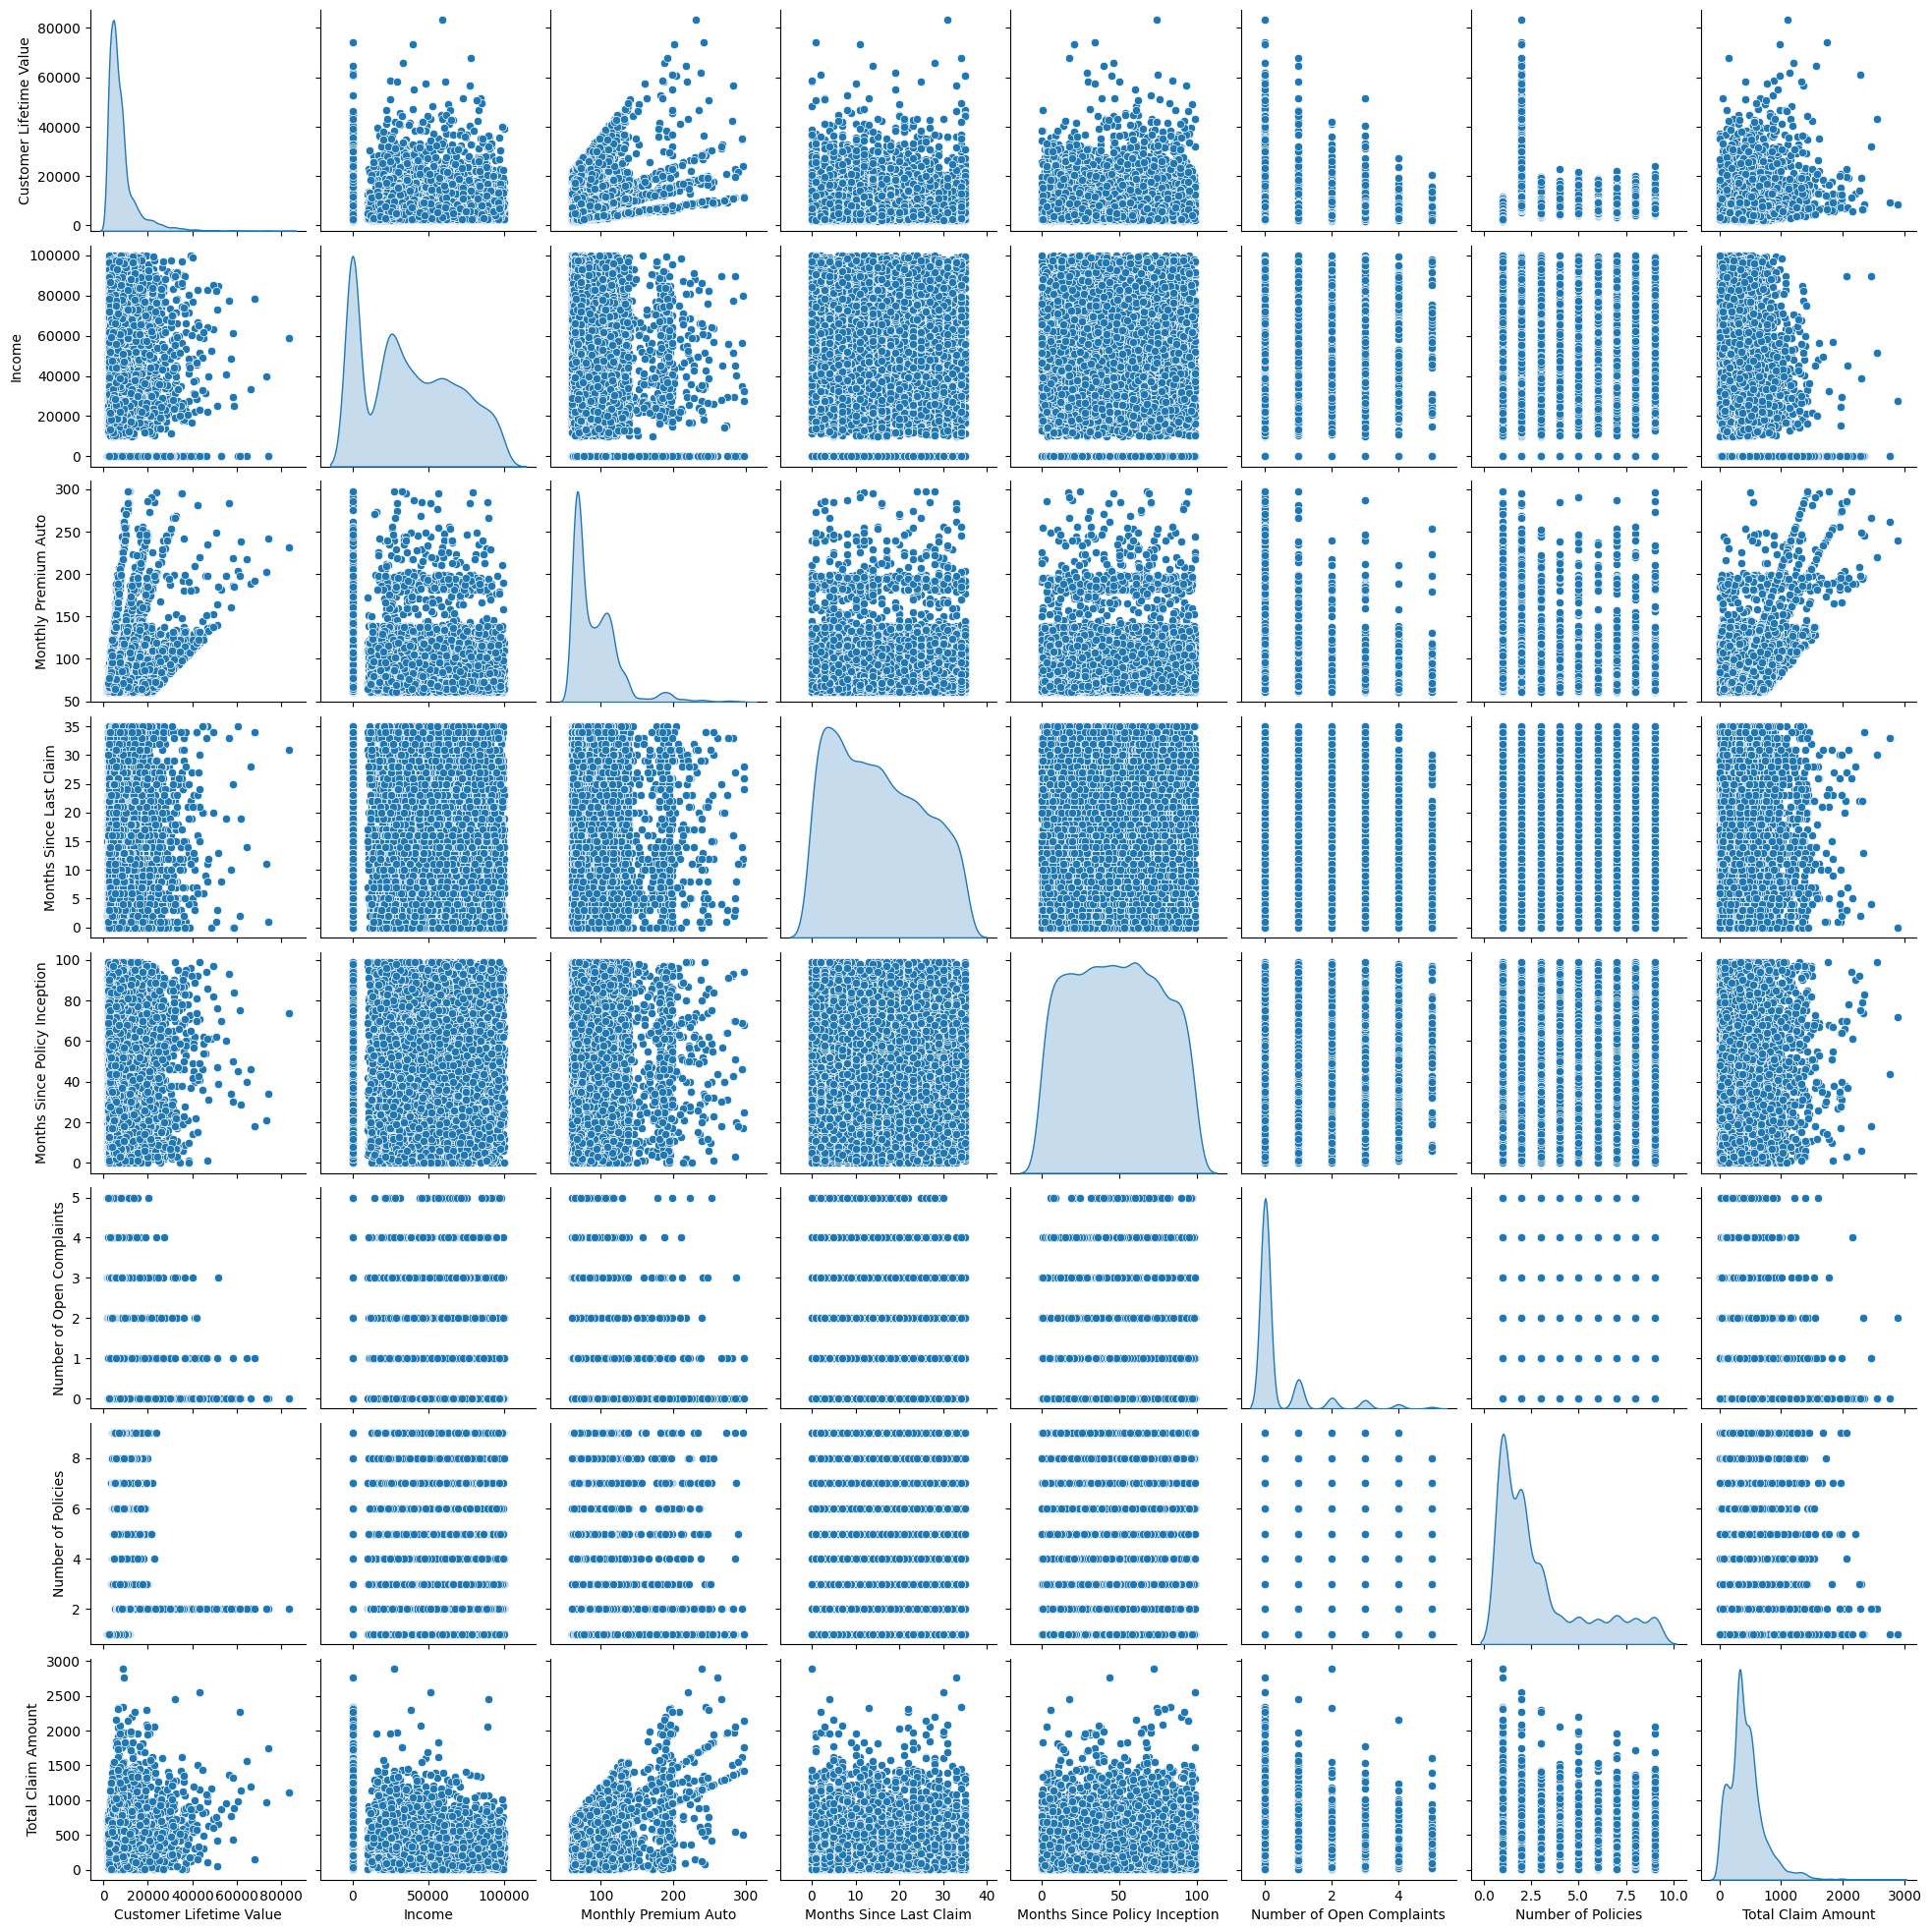

In [4]:
sns.pairplot(df, diag_kind='kde')
plt.show()

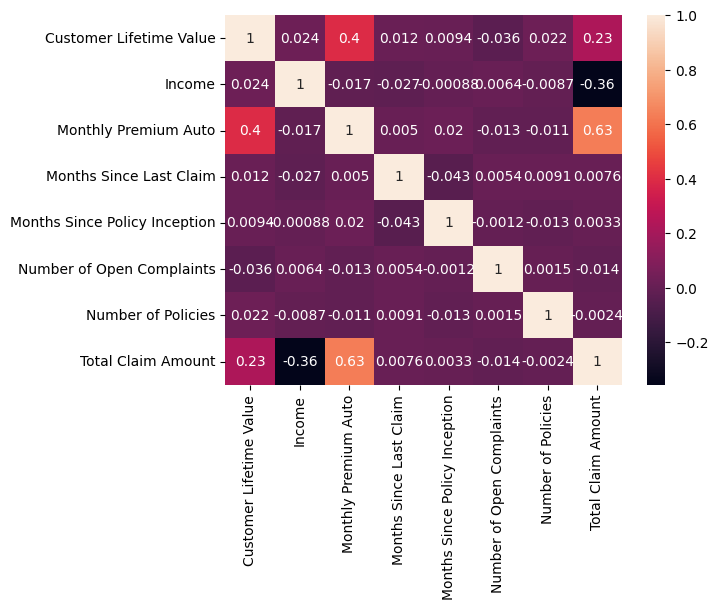

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()



*  close to +1 shows strong positive linear relation
*  close to -1 shows strong negative linear relation
*  close to 0 shows no relation





In [5]:
df1 = df.copy()

le = LabelEncoder()
df1['State'] = le.fit_transform(df1['State'])
df1['Response'] = le.fit_transform(df1['Response'])
df1['Coverage'] = le.fit_transform(df1['Coverage'])
df1['Education'] = le.fit_transform(df1['Education'])
df1['EmploymentStatus'] = le.fit_transform(df1['EmploymentStatus'])
df1['Gender'] = le.fit_transform(df1['Gender'])
df1['Location Code'] = le.fit_transform(df1['Location Code'])
df1['Marital Status'] = le.fit_transform(df1['Marital Status'])
df1['Policy Type'] = le.fit_transform(df1['Policy Type'])
df1['Policy'] = le.fit_transform(df1['Policy'])
df1['Renew Offer Type'] = le.fit_transform(df1['Renew Offer Type'])
df1['Sales Channel'] = le.fit_transform(df1['Sales Channel'])
df1['Vehicle Class'] = le.fit_transform(df1['Vehicle Class'])
df1['Vehicle Size'] = le.fit_transform(df1['Vehicle Size'])

In [ ]:
df1.head(6)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,4,2763.519279,0,0,0,2/24/11,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,QZ44356,0,6979.535903,0,1,0,1/31/11,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,AI49188,2,12887.431650,0,2,0,2/19/11,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,WW63253,1,7645.861827,0,0,0,1/20/11,4,1,0,1,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,HB64268,4,2813.692575,0,0,0,3/2/2011,1,1,43836,0,2,73,12,44,0,1,1,3,0,0,138.130879,0,1
5,OC83172,3,8256.297800,1,0,0,1/25/11,1,0,62902,0,1,69,14,94,0,2,1,5,1,3,159.383042,5,1


In [ ]:
df1.dtypes

Customer                          object
State                              int64
Customer Lifetime Value          float64
Response                           int64
Coverage                           int64
Education                          int64
Effective To Date                 object
EmploymentStatus                   int64
Gender                             int64
Income                             int64
Location Code                      int64
Marital Status                     int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                        int64
Policy                             int64
Renew Offer Type                   int64
Sales Channel                      int64
Total Claim Amount               float64
Vehicle Class                      int64
Vehicle Size                       int64
dtype: object

In [6]:
df1.drop(['Customer'], axis=1, inplace=True)

In [ ]:
df1.head(3)

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,2/24/11,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,1/31/11,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,2/19/11,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1


In [7]:
from datetime import datetime
df1['Effective To Date'] = pd.to_datetime(df1['Effective To Date'] )

In [ ]:
df1['Effective To Date'][:7]

0   2011-02-24
1   2011-01-31
2   2011-02-19
3   2011-01-20
4   2011-03-02
5   2011-01-25
6   2011-02-24
Name: Effective To Date, dtype: datetime64[ns]

In [ ]:
df1['Effective To Date'].dtypes

dtype('<M8[ns]')

In [8]:
df1['year'] = df1['Effective To Date'].dt.strftime('%Y')

In [ ]:
df1['year'][:4]

0    2011
1    2011
2    2011
3    2011
Name: year, dtype: object

In [9]:
df1['month'] = df1['Effective To Date'].dt.strftime('%m')

In [20]:
df1.drop(['Effective To Date'], axis=1, inplace=True)

In [ ]:
df1.head(3)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,year,month
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1,2011,02
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1,2011,01
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1,2011,02


In [ ]:
df1['year'].dtypes

dtype('O')

In [ ]:
df1['month'].dtypes

dtype('O')

In [21]:
df1['year'] = le.fit_transform(df1['year'])
df1['month'] = le.fit_transform(df1['month'])

In [ ]:
df1.head(3)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,year,month
0,4,2763.519279,0,0,0,1,0,56274,1,1,69,32,5,0,1,0,2,0,0,384.811147,5,1,0,1
1,0,6979.535903,0,1,0,4,0,0,1,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1,0,0
2,2,12887.431650,0,2,0,1,0,48767,1,1,108,18,38,0,2,1,5,0,0,566.472247,5,1,0,1


Model

In [22]:
X = df1.drop(['Customer Lifetime Value', 'year', 'month'], axis=1)
Y = df1['Customer Lifetime Value']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print( reg.score(X_train, Y_train)*100)
print( reg.score(X_test, Y_test)*100)

16.55860004466325
16.069337974121154


In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [65]:
Predicted_Y = reg.predict(X_test)
print(r2_score(Y_test, Predicted_Y))      #R2_score
print(mean_absolute_error(Y_test, Predicted_Y))    #MAE
print((mean_squared_error(Y_test, Predicted_Y)))    #MSE
print(np.sqrt(mean_squared_error(Y_test, Predicted_Y)))   #RMSE

0.16069337974121156
3905.2141543313783
38951545.05410665
6241.117292128602


OLS model

In [ ]:
num_cols = df.select_dtypes( include = 'number').columns
num_cols

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [ ]:
X_ols = df1[['Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount']]
Y_ols = df1['Customer Lifetime Value']

In [ ]:
X_ols[:5]

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,56274,69,32,5,0,1,384.811147
1,0,94,13,42,0,8,1131.464935
2,48767,108,18,38,0,2,566.472247
3,0,106,18,65,0,7,529.881344
4,43836,73,12,44,0,1,138.130879


In [ ]:
Y_ols[:5]

0     2763.519279
1     6979.535903
2    12887.431650
3     7645.861827
4     2813.692575
Name: Customer Lifetime Value, dtype: float64

In [ ]:
import statsmodels.api as sm

ols = sm.OLS(Y_ols, X_ols).fit()
print(ols.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Customer Lifetime Value   R-squared (uncentered):                   0.644
Model:                                 OLS   Adj. R-squared (uncentered):              0.643
Method:                      Least Squares   F-statistic:                              2356.
Date:                     Fri, 10 Nov 2023   Prob (F-statistic):                        0.00
Time:                             09:45:55   Log-Likelihood:                         -92862.
No. Observations:                     9134   AIC:                                  1.857e+05
Df Residuals:                         9127   BIC:                                  1.858e+05
Df Model:                                7                                                  
Covariance Type:                 nonrobust                                                  
                                    coef    std err          t      P>

Mann–Whitney U and also Kruskal Wallis test

In [ ]:
obj_cols = df.select_dtypes(include = 'object').columns
obj_cols

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [45]:
from scipy.stats import mannwhitneyu

category_a = df[df['Gender'] == 'F']['Customer Lifetime Value']
category_b = df[df['Gender'] == 'M']['Customer Lifetime Value']

u_stats, p_value = mannwhitneyu(category_a, category_b)

print("U-statistic:", u_stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference observed in the distribution of 'Value' between two Categories")
else:
    print("No significant difference observed in the distribution of 'Value' between two Categories.")

U-statistic: 10512074.0
P-value: 0.48749303056449833
No significant difference observed in the distribution of 'Value' between two Categories.


In [37]:
df['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [29]:
df['Education'].nunique()

5

In [46]:
from scipy.stats import mannwhitneyu

category_a = df[df['Education'] == 'Doctor']['Customer Lifetime Value']
category_b = df[df['Education'] == 'Master']['Customer Lifetime Value']
category_c = df[df['Education'] == 'High School or Below']['Customer Lifetime Value']
category_d = df[df['Education'] == 'College']['Customer Lifetime Value']
category_e = df[df['Education'] == 'Bachelor']['Customer Lifetime Value']

list = [ category_a , category_b, category_c, category_d, category_e  ]

for i in range(len(list)):
  for j in range(i+1, len(list)):
    # print(i, j)
    # print(list[i])
    u_stats, p_value = mannwhitneyu(list[i], list[j] )
    print("U-statistic:", u_stats)
    print("P-value:", p_value)
    if p_value < 0.05:
      print("Significant difference observed in the distribution of 'Value' between two Categories")    #.format( list[i], list[j] )
    else:
      print("No significant difference observed in the distribution of 'Value' between two Categories")

U-statistic: 118057.0
P-value: 0.07051046648566645
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 415255.0
P-value: 0.026138976791157398
Significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 442018.0
P-value: 0.2796790158451765
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 455712.0
P-value: 0.36157451430382415
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 966305.0
P-value: 0.825499063995647
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 1025919.0
P-value: 0.17075252993275947
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 1057331.0
P-value: 0.10725065698759438
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 3647897.0


In [48]:
from scipy.stats import kruskal

category_a = df[df['Gender'] == 'F']['Customer Lifetime Value']
category_b = df[df['Gender'] == 'M']['Customer Lifetime Value']

stats, p_value = kruskal(category_a, category_b)

print("U-statistic:", stats)
print("P-value:", p_value)

if p_value < 0.05:
    print("Significant difference observed in the distribution of 'Value' between two Categories")
else:
    print("No significant difference observed in the distribution of 'Value' between two Categories")

U-statistic: 0.4820603496792097
P-value: 0.48749054213997434
No significant difference observed in the distribution of 'Value' between two Categories


In [49]:
from scipy.stats import kruskal

category_a = df[df['Education'] == 'Doctor']['Customer Lifetime Value']
category_b = df[df['Education'] == 'Master']['Customer Lifetime Value']
category_c = df[df['Education'] == 'High School or Below']['Customer Lifetime Value']
category_d = df[df['Education'] == 'College']['Customer Lifetime Value']
category_e = df[df['Education'] == 'Bachelor']['Customer Lifetime Value']

list = [ category_a , category_b, category_c, category_d, category_e  ]

for i in range(len(list)):
  for j in range(i+1, len(list)):
    stats, p_value = kruskal(list[i], list[j] )
    print("U-statistic:", stats)
    print("P-value:", p_value)
    if p_value < 0.05:
      print("Significant difference observed in the distribution of 'Value' between two Categories")    #.format( list[i], list[j] )
    else:
      print("No significant difference observed in the distribution of 'Value' between two Categories")

U-statistic: 3.271474846794635
P-value: 0.07049422168918931
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 4.946951441740793
P-value: 0.02613671757166578
Significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 1.168720083975045
P-value: 0.27966438491822565
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 0.8324757925074752
P-value: 0.36155760341540033
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 0.048619905694006996
P-value: 0.8254823803571222
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 1.8763816126942094
P-value: 0.17074597157666044
No significant difference observed in the distribution of 'Value' between two Categories
U-statistic: 2.594338966953547
P-value: 0.10724617651078089
No significant difference observed in the dis

Ridge Lasso Model

In [60]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge = Ridge(alpha=45)  #alpha controls regularization strength
ridge.fit(X_train, Y_train)
print("Train Score (Ridge)",ridge.score(X_train, Y_train))
print("Test Score (Ridge)",ridge.score(X_test, Y_test))

Train Score (Ridge) 0.16557782723051684
Test Score (Ridge) 0.16086450420633724


In [61]:
# Lasso Regression
lasso = Lasso(alpha=0.5)  # alpha controls regularization strength
lasso.fit(X_train, Y_train)
print("Train Score (Lasso)",lasso.score(X_train, Y_train))
print("Test Score (Lasso)",lasso.score(X_test, Y_test))

Train Score (Lasso) 0.16558565895406285
Test Score (Lasso) 0.1607477689292941


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor( max_depth = 4, max_features='auto')    #sqrt log2 auto
dt.fit(X_train, Y_train)
print(dt.score(X_train, Y_train)*100)
print(dt.score(X_test, Y_test)*100)

67.51183498283527
66.09556109581523


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
dt = KNeighborsRegressor( n_neighbors=16,weights='uniform' )    #16 uniform
dt.fit(X_train, Y_train)
print(dt.score(X_train, Y_train)*100)
print(dt.score(X_test, Y_test)*100)

17.303770804110563
5.048790187692576


In [ ]:
from sklearn.svm import SVR
svr = SVR(  )    #linear', 'poly', 'rbf', 'sigmoid scale', 'auto'
svr.fit(X_train, Y_train)
print(svr.score(X_train, Y_train)*100)
print(svr.score(X_test, Y_test)*100)

13.163888543703195
13.320700308223532


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( n_estimators=7 , max_depth=4 )    #max_features : {"sqrt", "log2", None},
rfr.fit(X_train, Y_train)
print(rfr.score(X_train, Y_train)*100)
print(rfr.score(X_test, Y_test)*100)

68.02426607995893
67.97530624034714


In [ ]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor( n_estimators=29  )    #max_features : int or float  , max_features=15
br.fit(X_train, Y_train)
print(br.score(X_train, Y_train)*100)
print(br.score(X_test, Y_test)*100)

95.17062574092527
70.90348110322947


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
br = AdaBoostRegressor(  n_estimators=7)
br.fit(X_train, Y_train)
print(br.score(X_train, Y_train)*100)
print(br.score(X_test, Y_test)*100)

63.718040754294115
63.50685944802144


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor( n_estimators=70 )
gr.fit(X_train, Y_train)
print(gr.score(X_train, Y_train)*100)
print(gr.score(X_test, Y_test)*100)

71.94286650460067
69.28977650843822


In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor( n_estimators=7 , max_depth=4 )
xgbr.fit(X_train, Y_train)
print(xgbr.score(X_train, Y_train)*100)
print(xgbr.score(X_test, Y_test)*100)

69.21262151002398
68.42700310597661


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

params_grid = {
            "n_estimators":[1, 4, 7, 9, 11, 17, 19],
            "max_depth" : [1,3,5,7,9,11,12],
            # "random_state":[1,2,3,4,5,6,7,8,9,10],
            # max_features: []
            }

rf_gscv = GridSearchCV( rf, params_grid, cv=10)

rf_gscv.fit(X_train, Y_train)
print(rf_gscv.score(X_train, Y_train)*100)
print(rf_gscv.score(X_test, Y_test)*100)

89.08223888011585
70.14478462763988


In [27]:
rf_gscv.best_params_

{'max_depth': 12, 'n_estimators': 19}

In [66]:
Predicted_Y = rf_gscv.predict(X_test)
print(r2_score(Y_test, Predicted_Y))      #R2_score
print(mean_absolute_error(Y_test, Predicted_Y))    #MAE
print((mean_squared_error(Y_test, Predicted_Y)))    #MSE
print(np.sqrt(mean_squared_error(Y_test, Predicted_Y)))   #RMSE

0.7014478462763988
1458.9258078281962
13855565.279801758
3722.306446251001
